In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,matthews_corrcoef,recall_score
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics, svm,tree
from sklearn.model_selection import train_test_split,cross_val_score,cross_validate,GridSearchCV

In [63]:
data = pd.read_csv('C:\\Users\\centrtal2021\\Desktop\\adultes.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,">50K, <=50K."
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [64]:
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
data['workclass']= label_encoder.fit_transform(data['workclass'])
data['workclass'].unique()

data['education']= label_encoder.fit_transform(data['education'])
data['education'].unique()

data['marital-status']= label_encoder.fit_transform(data['marital-status'])
data['marital-status'].unique()

data['occupation']= label_encoder.fit_transform(data['occupation'])
data['occupation'].unique()

data['relationship']= label_encoder.fit_transform(data['relationship'])
data['relationship'].unique()

data['race']= label_encoder.fit_transform(data['race'])
data['race'].unique()

data['sex']= label_encoder.fit_transform(data['sex'])
data['sex'].unique()

data['native-country']= label_encoder.fit_transform(data['native-country'])
data['native-country'].unique()

data['>50K, <=50K.']= label_encoder.fit_transform(data['>50K, <=50K.'])
data['>50K, <=50K.'].unique()

array([0, 1])

In [65]:
data.head(15)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,">50K, <=50K."
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
5,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
6,49,4,160187,6,5,3,8,1,2,0,0,0,16,23,0
7,52,6,209642,11,9,2,4,0,4,1,0,0,45,39,1
8,31,4,45781,12,14,4,10,1,4,0,14084,0,50,39,1
9,42,4,159449,9,13,2,4,0,4,1,5178,0,40,39,1


In [66]:
df1=data.sample(n=3256)
df1.head(11)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,">50K, <=50K."
1147,46,4,185041,11,9,2,7,0,4,1,0,0,50,39,0
16572,45,7,36032,11,9,0,11,4,2,0,0,0,40,39,0
5866,51,6,25932,11,9,2,5,0,4,1,0,0,60,39,0
1219,38,4,200818,14,15,2,10,0,4,1,0,0,40,39,1
4264,49,4,204629,9,13,2,4,0,4,1,0,0,40,39,1
20705,33,2,156015,8,11,2,13,0,4,1,0,0,40,39,0
13044,45,4,27332,11,9,0,12,1,4,0,0,0,40,39,0
4710,26,4,210812,15,10,0,3,1,4,1,0,0,43,39,0
9699,28,4,109162,12,14,4,10,1,4,0,0,0,50,39,0
7571,51,4,196501,9,13,0,4,1,4,1,14084,0,50,39,1


In [67]:
data=data.drop(df1.index)

In [68]:
df2=data.sample(n=3256)
data=data.drop(df2.index)
df3=data.sample(n=3256)
data=data.drop(df3.index)
df4=data.sample(n=3256)
data=data.drop(df4.index)
df5=data.sample(n=3256)
data=data.drop(df5.index)
df6=data.sample(n=3256)
data=data.drop(df6.index)
df7=data.sample(n=3256)
data=data.drop(df7.index)
df8=data.sample(n=3256)
data=data.drop(df8.index)
df9=data.sample(n=3256)
data=data.drop(df9.index)
df10=data.sample(n=3256)
data=data.drop(df10.index)

In [69]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,">50K, <=50K."
24316,56,4,189975,15,10,2,3,0,4,1,0,1902,60,39,1


In [70]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [71]:
df1.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,">50K, <=50K."
1147,46,4,185041,11,9,2,7,0,4,1,0,0,50,39,0
16572,45,7,36032,11,9,0,11,4,2,0,0,0,40,39,0
5866,51,6,25932,11,9,2,5,0,4,1,0,0,60,39,0
1219,38,4,200818,14,15,2,10,0,4,1,0,0,40,39,1
4264,49,4,204629,9,13,2,4,0,4,1,0,0,40,39,1


# #DT by df1

In [72]:
Xtrain=df1.iloc[:, :-1]
Ytrain=df1.iloc[:,-1]
Xtest=df10.iloc[:, :-1]
Ytest=df10.iloc[:,-1]

In [73]:
DT = DecisionTreeClassifier()


DT.fit(Xtrain, Ytrain)
#روی چه دیتایی فیت بشه


pred = DT.predict(Xtest)
#ارزیابی داده های آزمایش جهت پیش بینی

pred

array([0, 0, 1, ..., 1, 1, 0])

In [74]:
pred == Ytest
#نمایش پیش بینی درست و غلط

4963      True
28526     True
14506    False
25062    False
4863     False
         ...  
28191     True
30882    False
4808      True
20884     True
29870     True
Name: >50K, <=50K., Length: 3256, dtype: bool

In [75]:
(pred == Ytest).mean()
#accuracy

0.8077395577395577

In [76]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Ytest,pred))

Accuracy: 0.8077395577395577


In [77]:
from sklearn.metrics import accuracy_score,recall_score,precision_score, f1_score, confusion_matrix

from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(Xtrain, Ytrain)
pred = DT.predict(Xtest)


acc = accuracy_score(Ytest, pred)
#برای وقتی هست که داده ها متوازن باشن
rec = recall_score(Ytest, pred)



pre = precision_score(Ytest, pred)


fm = f1_score(Ytest, pred)


conf = confusion_matrix(Ytest, pred)

print(acc, rec, pre, fm)
print(conf)
print(classification_report(Ytest, pred))
# دو هزار صد سی شش داده به درستی صفر تشخیص داده شده
#چهارصد هفتاد شش داده به درستی یک تشخیص داده شده
# باقی مانده اشتباهات  هستند

0.8022113022113022 0.6086956521739131 0.5847665847665847 0.5964912280701755
[[2136  338]
 [ 306  476]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      2474
           1       0.58      0.61      0.60       782

    accuracy                           0.80      3256
   macro avg       0.73      0.74      0.73      3256
weighted avg       0.81      0.80      0.80      3256



In [78]:
rec = recall_score(Ytest, pred, pos_label = 0)
pre = precision_score(Ytest, pred,pos_label = 0 )
fm = f1_score(Ytest, pred, pos_label = 0)
print(rec, pre, fm)


0.8633791430881164 0.8746928746928747 0.8689991863303498


# pruning and train-test graph

In [92]:
# helper function
classes=['<=50','>=50']
def plot_confusionmatrix(y_train_pred,Ytrain,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,Ytrain)
    sns.heatmap(cf,annot=True,yticklabels=classes
               ,xticklabels=classes,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()

In [80]:
path = DT.cost_complexity_pruning_path(Xtrain, Ytrain)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.         0.00015298 0.00019013 0.00019688 0.00019906 0.00020234
 0.00020295 0.000204   0.00020475 0.00020475 0.00020475 0.00020475
 0.0002457  0.0002457  0.0002457  0.0002457  0.00024578 0.00025594
 0.00025594 0.00025594 0.00025594 0.00025594 0.00025594 0.00025594
 0.00025875 0.00025988 0.00026325 0.00026325 0.00026873 0.00027056
 0.000273   0.000273   0.000273   0.000273   0.0002792  0.0002792
 0.0002835  0.0002835  0.00028519 0.0002858  0.00028793 0.00028906
 0.00029006 0.00029177 0.00029317 0.00029484 0.00029531 0.00029531
 0.00029722 0.00029809 0.00029835 0.00029871 0.00029998 0.00030059
 0.00030073 0.00030122 0.0003015  0.00030713 0.00030713 0.00030713
 0.00030713 0.00030713 0.00031152 0.00031468 0.00032175 0.00033505
 0.00033505 0.00033631 0.00034125 0.00034125 0.00034247 0.000351
 0.000351   0.000351   0.00035263 0.00035387 0.00036563 0.00036855
 0.00036855 0.00036855 0.00036855 0.00036855 0.00036873 0.00037275
 0.00038457 0.00039007 0.00039207 0.00039488 0.00039709 0.0003970

In [82]:
# For each alpha we will append our model to a list
DTs = []
for ccp_alpha in ccp_alphas:
    DT = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    DT.fit(Xtrain, Ytrain)
    DTs.append(DT)

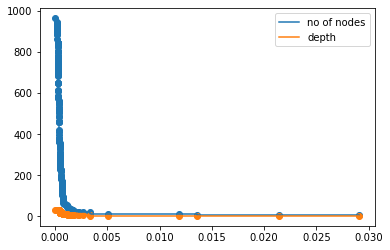

In [83]:
DTs = DTs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [DT.tree_.node_count for DT in DTs]
depth = [DT.tree_.max_depth for DT in DTs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

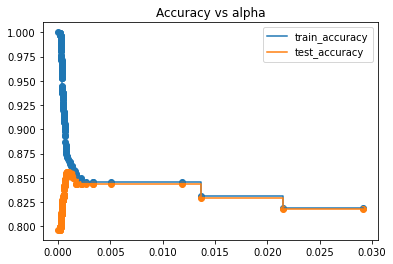

In [84]:
train_acc = []
test_acc = []
for c in DTs:
    y_train_pred = c.predict(Xtrain)
    y_test_pred = c.predict(Xtest)
    train_acc.append(accuracy_score(y_train_pred,Ytrain))
    test_acc.append(accuracy_score(y_test_pred,Ytest))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

Train score 0.8694717444717445
Test score 0.8562653562653563
Train Confusion matrix


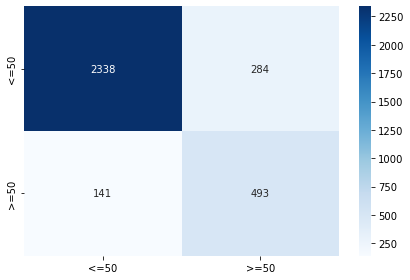

Test Confusion matrix


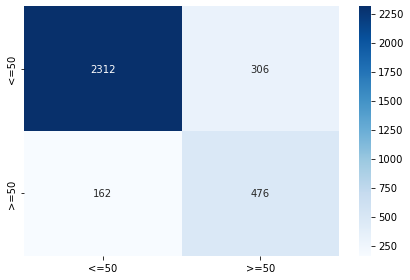

In [95]:
clf_ = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.0010)
clf_.fit(Xtrain,Ytrain)
y_train_pred = clf_.predict(Xtrain)
y_test_pred = clf_.predict(Xtest)

print(f'Train score {accuracy_score(y_train_pred,Ytrain)}')
print(f'Test score {accuracy_score(y_test_pred,Ytest)}')
plot_confusionmatrix(y_train_pred,Ytrain,dom='Train')
plot_confusionmatrix(y_test_pred,Ytest,dom='Test')

# بهترین آلفا انتخاب شد

## DT by df2

In [96]:
Xtrain=df2.iloc[:, :-1]
Ytrain=df2.iloc[:,-1]
Xtest=df10.iloc[:, :-1]
Ytest=df10.iloc[:,-1]

DT = DecisionTreeClassifier()


DT.fit(Xtrain, Ytrain)
#روی چه دیتایی فیت بشه


pred = DT.predict(Xtest)
#ارزیابی داده های آزمایش جهت پیش بینی

pred

array([0, 0, 0, ..., 0, 1, 0])

In [97]:
(pred == Ytest).mean()
#accuracy

0.8000614250614251

In [98]:
from sklearn.metrics import accuracy_score,recall_score,precision_score, f1_score, confusion_matrix

from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(Xtrain, Ytrain)
pred = DT.predict(Xtest)


acc = accuracy_score(Ytest, pred)
#برای وقتی هست که داده ها متوازن باشن
#مثل دیتاست گل ها که همگی متوازن بودن

rec = recall_score(Ytest, pred)



pre = precision_score(Ytest, pred)


fm = f1_score(Ytest, pred)


conf = confusion_matrix(Ytest, pred)

print(acc, rec, pre, fm)
print(conf)
print(classification_report(Ytest, pred))
#دو هزار صد سی هفت به درستی صفر تشخیص داده شده
#چهارصد هفتاد شش به درستی یک تشخیص داده شده
#عدد باقی مانده اشتباهات  هستند

0.8025184275184275 0.6086956521739131 0.5854858548585485 0.5968652037617553
[[2137  337]
 [ 306  476]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      2474
           1       0.59      0.61      0.60       782

    accuracy                           0.80      3256
   macro avg       0.73      0.74      0.73      3256
weighted avg       0.81      0.80      0.80      3256



# pruning and train-test graph

[0.         0.00015339 0.000195   0.00019999 0.00020183 0.00020302
 0.00020475 0.00020475 0.00020475 0.0002223  0.00023034 0.00023034
 0.00023034 0.0002457  0.0002457  0.00025128 0.0002558  0.00025594
 0.00025594 0.00026325 0.00026618 0.00026873 0.000273   0.000273
 0.00027641 0.00027641 0.00027641 0.0002792  0.0002792  0.0002792
 0.00028042 0.00028153 0.00028153 0.00028519 0.00028519 0.00028665
 0.00028665 0.00028665 0.00028793 0.00028857 0.00028906 0.00029006
 0.00029006 0.00029096 0.00029177 0.00029234 0.00029317 0.00029653
 0.00029835 0.00029904 0.00029925 0.00029998 0.00030059 0.00030098
 0.00030713 0.00030713 0.00030713 0.00030713 0.000315   0.00031802
 0.00032199 0.00032308 0.00034369 0.00034521 0.000351   0.00035203
 0.00035554 0.00035916 0.00036406 0.00036855 0.00036855 0.00036855
 0.00036855 0.00036855 0.00037585 0.00038391 0.00039195 0.00039312
 0.00039747 0.00039759 0.00040497 0.0004095  0.0004095  0.0004095
 0.0004095  0.0004095  0.0004095  0.0004095  0.0004095  0.0004095


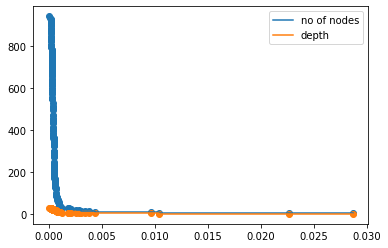

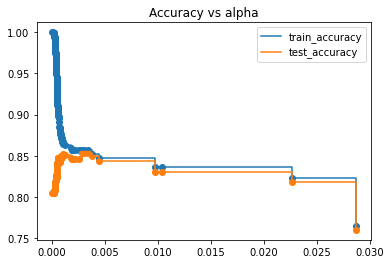

In [100]:
path = DT.cost_complexity_pruning_path(Xtrain, Ytrain)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

# For each alpha we will append our model to a list
DTs = []
for ccp_alpha in ccp_alphas:
    DT = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    DT.fit(Xtrain, Ytrain)
    DTs.append(DT)
    
DTs = DTs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [DT.tree_.node_count for DT in DTs]
depth = [DT.tree_.max_depth for DT in DTs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

train_acc = []
test_acc = []
for c in DTs:
    y_train_pred = c.predict(Xtrain)
    y_test_pred = c.predict(Xtest)
    train_acc.append(accuracy_score(y_train_pred,Ytrain))
    test_acc.append(accuracy_score(y_test_pred,Ytest))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

Train score 0.8516584766584766
Test score 0.8492014742014742
Train Confusion matrix


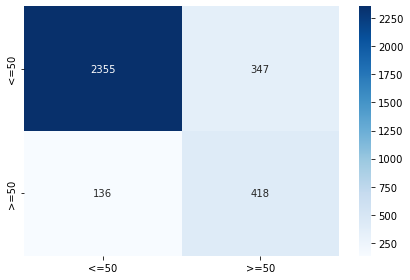

Test Confusion matrix


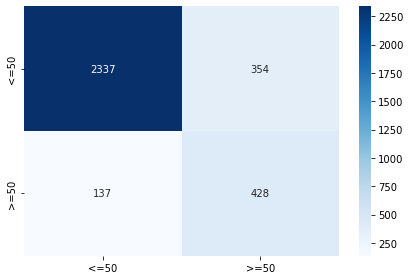

In [101]:
clf_ = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.0040)
clf_.fit(Xtrain,Ytrain)
y_train_pred = clf_.predict(Xtrain)
y_test_pred = clf_.predict(Xtest)

print(f'Train score {accuracy_score(y_train_pred,Ytrain)}')
print(f'Test score {accuracy_score(y_test_pred,Ytest)}')
plot_confusionmatrix(y_train_pred,Ytrain,dom='Train')
plot_confusionmatrix(y_test_pred,Ytest,dom='Test')

# بهترین آلفا انتخاب شد

## DT by df3 

In [102]:
Xtrain=df3.iloc[:, :-1]
Ytrain=df3.iloc[:,-1]
Xtest=df10.iloc[:, :-1]
Ytest=df10.iloc[:,-1]

DT = DecisionTreeClassifier()


DT.fit(Xtrain, Ytrain)
#روی چه دیتایی فیت بشه


pred = DT.predict(Xtest)
#ارزیابی داده های آزمایش جهت پیش بینی

pred

array([0, 1, 1, ..., 0, 0, 0])

In [103]:
(pred == Ytest).mean()
#accuracy

0.8028255528255528

In [104]:
from sklearn.metrics import accuracy_score,recall_score,precision_score, f1_score, confusion_matrix

from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(Xtrain, Ytrain)
pred = DT.predict(Xtest)


acc = accuracy_score(Ytest, pred)
#برای وقتی هست که داده ها متوازن باشن
#مثل دیتاست گل ها که همگی متوازن بودن

rec = recall_score(Ytest, pred)



pre = precision_score(Ytest, pred)


fm = f1_score(Ytest, pred)


conf = confusion_matrix(Ytest, pred)

print(acc, rec, pre, fm)
print(conf)
print(classification_report(Ytest, pred))
#دو هزار صد چهل داده به درستی صفر تشخیص داده شده
#چهارصد هفتاد هشت داده به درستی یک تشخیص داده شده
#دو عدد باقی مانده اشتباهات  هستند

0.8040540540540541 0.6112531969309463 0.5886699507389163 0.5997490589711417
[[2140  334]
 [ 304  478]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      2474
           1       0.59      0.61      0.60       782

    accuracy                           0.80      3256
   macro avg       0.73      0.74      0.74      3256
weighted avg       0.81      0.80      0.81      3256



# pruning and train-test graph

[0.         0.0001503  0.00017916 0.00019271 0.00019338 0.00019815
 0.0001995  0.0002002  0.00020326 0.00020446 0.00020475 0.00023034
 0.00023034 0.00023034 0.00023034 0.00023242 0.00025594 0.00025594
 0.00025594 0.00026325 0.00026325 0.00026325 0.00026325 0.00026325
 0.00026325 0.00026827 0.00026873 0.00026873 0.000273   0.000273
 0.000273   0.000273   0.000273   0.00027641 0.00027641 0.0002792
 0.0002809  0.00028256 0.0002835  0.0002835  0.0002835  0.0002835
 0.0002835  0.0002877  0.00028888 0.00028906 0.00028906 0.00029178
 0.0002925  0.00029317 0.00029484 0.00029594 0.00029859 0.00029963
 0.00030201 0.00030286 0.00030713 0.00030713 0.00030713 0.00030713
 0.00032248 0.00032257 0.00032288 0.00033137 0.00034125 0.0003465
 0.00034664 0.000351   0.0003519  0.00035552 0.00035831 0.00036047
 0.000364   0.00036563 0.00036855 0.00036855 0.00036855 0.00036855
 0.00037025 0.00037227 0.00038171 0.00039053 0.00039286 0.00039488
 0.00039678 0.0004095  0.0004095  0.0004095  0.0004095  0.0004095
 

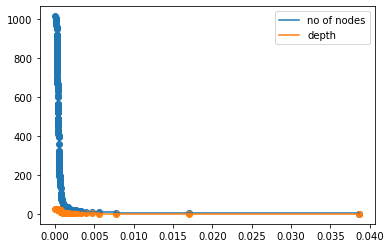

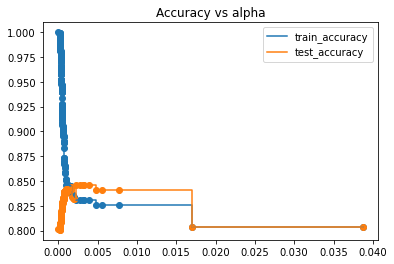

In [105]:
path = DT.cost_complexity_pruning_path(Xtrain, Ytrain)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

# For each alpha we will append our model to a list
DTs = []
for ccp_alpha in ccp_alphas:
    DT = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    DT.fit(Xtrain, Ytrain)
    DTs.append(DT)
    
DTs = DTs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [DT.tree_.node_count for DT in DTs]
depth = [DT.tree_.max_depth for DT in DTs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

train_acc = []
test_acc = []
for c in DTs:
    y_train_pred = c.predict(Xtrain)
    y_test_pred = c.predict(Xtest)
    train_acc.append(accuracy_score(y_train_pred,Ytrain))
    test_acc.append(accuracy_score(y_test_pred,Ytest))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

Train score 0.8513513513513513
Test score 0.8390663390663391
Train Confusion matrix


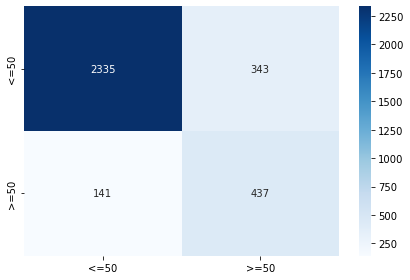

Test Confusion matrix


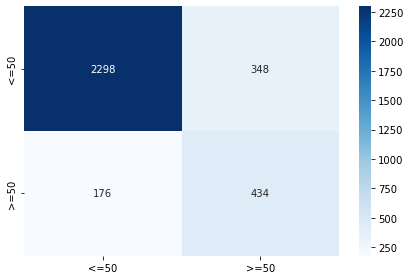

In [109]:
clf_ = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.0010)
clf_.fit(Xtrain,Ytrain)
y_train_pred = clf_.predict(Xtrain)
y_test_pred = clf_.predict(Xtest)

print(f'Train score {accuracy_score(y_train_pred,Ytrain)}')
print(f'Test score {accuracy_score(y_test_pred,Ytest)}')
plot_confusionmatrix(y_train_pred,Ytrain,dom='Train')
plot_confusionmatrix(y_test_pred,Ytest,dom='Test')

# بهترین آلفا انتخاب شد

## DT by df4

In [110]:
Xtrain=df4.iloc[:, :-1]
Ytrain=df4.iloc[:,-1]
Xtest=df10.iloc[:, :-1]
Ytest=df10.iloc[:,-1]

DT = DecisionTreeClassifier()


DT.fit(Xtrain, Ytrain)
#روی چه دیتایی فیت بشه


pred = DT.predict(Xtest)
#ارزیابی داده های آزمایش جهت پیش بینی

pred

array([1, 0, 0, ..., 0, 1, 0])

In [111]:
(pred == Ytest).mean()
#accuracy

0.8012899262899262

In [112]:
from sklearn.metrics import accuracy_score,recall_score,precision_score, f1_score, confusion_matrix

from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(Xtrain, Ytrain)
pred = DT.predict(Xtest)


acc = accuracy_score(Ytest, pred)
#برای وقتی هست که داده ها متوازن باشن
#مثل دیتاست گل ها که همگی متوازن بودن

rec = recall_score(Ytest, pred)



pre = precision_score(Ytest, pred)


fm = f1_score(Ytest, pred)


conf = confusion_matrix(Ytest, pred)

print(acc, rec, pre, fm)
print(conf)
print(classification_report(Ytest, pred))
#دوهزار صد بیست هشت داده به درستی صفر تشخیص داده شده
#چهارصد شصت چهار داده به درستی یک تشخیص داده شده
# باقی مانده اشتباهات  هستند

0.7960687960687961 0.5933503836317136 0.5728395061728395 0.5829145728643216
[[2128  346]
 [ 318  464]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      2474
           1       0.57      0.59      0.58       782

    accuracy                           0.80      3256
   macro avg       0.72      0.73      0.72      3256
weighted avg       0.80      0.80      0.80      3256



# pruning and train-test graph

[0.         0.0001638  0.00017063 0.00017916 0.00018428 0.0001911
 0.00019769 0.00019835 0.00020322 0.00020417 0.00020475 0.00020763
 0.00023034 0.00024311 0.0002457  0.00025529 0.00025594 0.00025594
 0.00025594 0.00025594 0.00025594 0.00025594 0.00025594 0.00026325
 0.00026325 0.00026325 0.00026325 0.00026325 0.00026873 0.000273
 0.00027641 0.00027641 0.00027641 0.00027833 0.0002792  0.0002792
 0.00028153 0.0002835  0.0002835  0.0002871  0.0002925  0.0002925
 0.00029433 0.00029531 0.0002964  0.0002999  0.00030045 0.00030064
 0.00030303 0.00030713 0.00030713 0.00030713 0.00030713 0.00031106
 0.00031158 0.00031643 0.00031876 0.00031931 0.00031992 0.00033505
 0.00033784 0.00034045 0.00034392 0.0003465  0.00034808 0.000351
 0.000351   0.000351   0.00036132 0.00036349 0.000364   0.000364
 0.0003664  0.00036855 0.00036855 0.00036855 0.00036855 0.00036855
 0.00037165 0.00037227 0.0003744  0.0003744  0.00038171 0.00038391
 0.0003861  0.00039488 0.00039488 0.00039488 0.0003962  0.00039886
 0.0

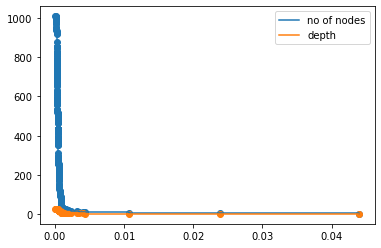

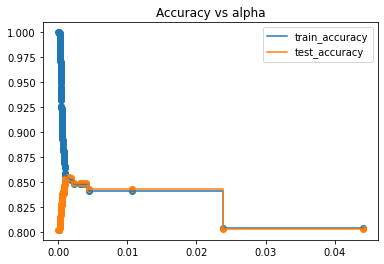

In [113]:
path = DT.cost_complexity_pruning_path(Xtrain, Ytrain)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

# For each alpha we will append our model to a list
DTs = []
for ccp_alpha in ccp_alphas:
    DT = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    DT.fit(Xtrain, Ytrain)
    DTs.append(DT)
    
DTs = DTs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [DT.tree_.node_count for DT in DTs]
depth = [DT.tree_.max_depth for DT in DTs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

train_acc = []
test_acc = []
for c in DTs:
    y_train_pred = c.predict(Xtrain)
    y_test_pred = c.predict(Xtest)
    train_acc.append(accuracy_score(y_train_pred,Ytrain))
    test_acc.append(accuracy_score(y_test_pred,Ytest))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

Train score 0.8541154791154791
Test score 0.855036855036855
Train Confusion matrix


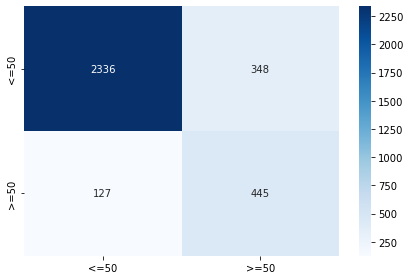

Test Confusion matrix


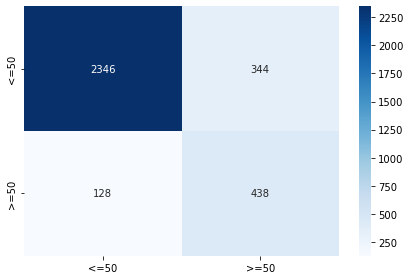

In [115]:
clf_ = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.0015)
clf_.fit(Xtrain,Ytrain)
y_train_pred = clf_.predict(Xtrain)
y_test_pred = clf_.predict(Xtest)

print(f'Train score {accuracy_score(y_train_pred,Ytrain)}')
print(f'Test score {accuracy_score(y_test_pred,Ytest)}')
plot_confusionmatrix(y_train_pred,Ytrain,dom='Train')
plot_confusionmatrix(y_test_pred,Ytest,dom='Test')

# بهترین آلفا انتخاب شد

## DT by df5

In [116]:
Xtrain=df5.iloc[:, :-1]
Ytrain=df5.iloc[:,-1]
Xtest=df10.iloc[:, :-1]
Ytest=df10.iloc[:,-1]

DT = DecisionTreeClassifier()


DT.fit(Xtrain, Ytrain)
#روی چه دیتایی فیت بشه


pred = DT.predict(Xtest)
#ارزیابی داده های آزمایش جهت پیش بینی

pred

array([0, 0, 0, ..., 0, 0, 0])

In [117]:
(pred == Ytest).mean()
#accuracy

0.8000614250614251

In [118]:
from sklearn.metrics import accuracy_score,recall_score,precision_score, f1_score, confusion_matrix

from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(Xtrain, Ytrain)
pred = DT.predict(Xtest)


acc = accuracy_score(Ytest, pred)
#برای وقتی هست که داده ها متوازن باشن
#مثل دیتاست گل ها که همگی متوازن بودن

rec = recall_score(Ytest, pred)



pre = precision_score(Ytest, pred)


fm = f1_score(Ytest, pred)


conf = confusion_matrix(Ytest, pred)

print(acc, rec, pre, fm)
print(conf)
print(classification_report(Ytest, pred))
#دوهزار صد و پنج داده به درستی صفر تشخیص داده شده
#چهارصد هشتاد یک داده به درستی یک تشخیص داده شده
# باقی مانده اشتباهات  هستند

0.7942260442260443 0.6150895140664961 0.5658823529411765 0.5894607843137254
[[2105  369]
 [ 301  481]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      2474
           1       0.57      0.62      0.59       782

    accuracy                           0.79      3256
   macro avg       0.72      0.73      0.73      3256
weighted avg       0.80      0.79      0.80      3256



# pruning and train-test graph

[0.         0.00015092 0.00015295 0.000182   0.00018428 0.00018428
 0.0001911  0.00019271 0.00019568 0.00020134 0.00020475 0.00023081
 0.0002457  0.0002457  0.00025128 0.00025534 0.00025594 0.00025594
 0.00025988 0.00026325 0.00026325 0.00026413 0.00026873 0.00026873
 0.00026873 0.000273   0.000273   0.00027641 0.0002792  0.0002792
 0.00028153 0.0002835  0.0002835  0.0002835  0.0002835  0.00028438
 0.00028519 0.00028665 0.00028906 0.00029096 0.00029377 0.00029433
 0.00029575 0.00029945 0.00029975 0.0003003  0.00030165 0.00030172
 0.00030542 0.00030713 0.00030713 0.00030713 0.00030713 0.00030713
 0.00031054 0.00031427 0.00031992 0.00032795 0.00034125 0.00034125
 0.0003473  0.000351   0.00035105 0.00035328 0.00035831 0.00035988
 0.00036132 0.00036563 0.00036753 0.00036855 0.00036855 0.00036914
 0.00037402 0.00037674 0.00037848 0.00038391 0.00038391 0.00039089
 0.00039089 0.00039089 0.00040163 0.0004095  0.0004095  0.0004095
 0.0004095  0.0004095  0.0004095  0.0004095  0.0004095  0.000409

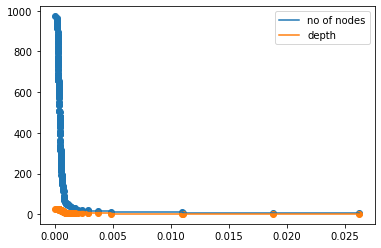

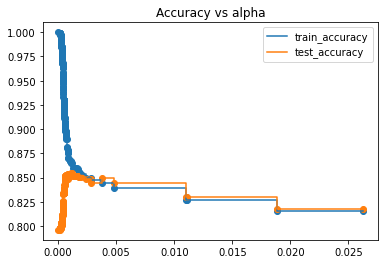

In [119]:
path = DT.cost_complexity_pruning_path(Xtrain, Ytrain)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

# For each alpha we will append our model to a list
DTs = []
for ccp_alpha in ccp_alphas:
    DT = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    DT.fit(Xtrain, Ytrain)
    DTs.append(DT)
    
DTs = DTs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [DT.tree_.node_count for DT in DTs]
depth = [DT.tree_.max_depth for DT in DTs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

train_acc = []
test_acc = []
for c in DTs:
    y_train_pred = c.predict(Xtrain)
    y_test_pred = c.predict(Xtest)
    train_acc.append(accuracy_score(y_train_pred,Ytrain))
    test_acc.append(accuracy_score(y_test_pred,Ytest))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

Train score 0.8617936117936118
Test score 0.8538083538083538
Train Confusion matrix


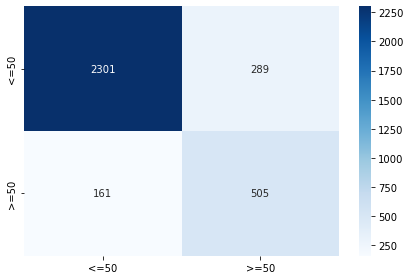

Test Confusion matrix


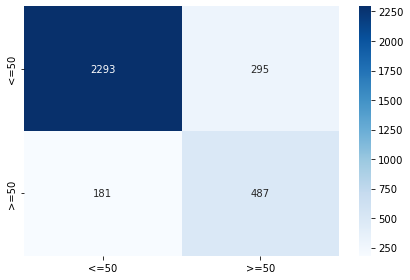

In [123]:
clf_ = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.0012)
clf_.fit(Xtrain,Ytrain)
y_train_pred = clf_.predict(Xtrain)
y_test_pred = clf_.predict(Xtest)

print(f'Train score {accuracy_score(y_train_pred,Ytrain)}')
print(f'Test score {accuracy_score(y_test_pred,Ytest)}')
plot_confusionmatrix(y_train_pred,Ytrain,dom='Train')
plot_confusionmatrix(y_test_pred,Ytest,dom='Test')

# بهترین آلفا انتخاب شد

## DT by df6

In [124]:
Xtrain=df6.iloc[:, :-1]
Ytrain=df6.iloc[:,-1]
Xtest=df10.iloc[:, :-1]
Ytest=df10.iloc[:,-1]

DT = DecisionTreeClassifier()


DT.fit(Xtrain, Ytrain)
#روی چه دیتایی فیت بشه


pred = DT.predict(Xtest)
#ارزیابی داده های آزمایش جهت پیش بینی

pred

array([0, 0, 0, ..., 1, 1, 0])

In [125]:
(pred == Ytest).mean()
#accuracy

0.8101965601965602

In [126]:
from sklearn.metrics import accuracy_score,recall_score,precision_score, f1_score, confusion_matrix

from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(Xtrain, Ytrain)
pred = DT.predict(Xtest)


acc = accuracy_score(Ytest, pred)
#برای وقتی هست که داده ها متوازن باشن
#مثل دیتاست گل ها که همگی متوازن بودن

rec = recall_score(Ytest, pred)



pre = precision_score(Ytest, pred)


fm = f1_score(Ytest, pred)


conf = confusion_matrix(Ytest, pred)

print(acc, rec, pre, fm)
print(conf)
print(classification_report(Ytest, pred))
#دوهزار صد پنجاه یک داده به درستی صفر تشخیص داده شده
#چهارصد هشت هفت داده به درستی یک تشخیص داده شده
# باقی مانده اشتباهات  هستند

0.8101965601965602 0.6227621483375959 0.6012345679012345 0.6118090452261306
[[2151  323]
 [ 295  487]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      2474
           1       0.60      0.62      0.61       782

    accuracy                           0.81      3256
   macro avg       0.74      0.75      0.74      3256
weighted avg       0.81      0.81      0.81      3256



# pruning and train-test graph

[0.         0.00010238 0.00018614 0.0001882  0.00019744 0.00020371
 0.00020475 0.00023359 0.0002457  0.0002457  0.0002457  0.0002457
 0.0002457  0.0002457  0.00025594 0.00025959 0.00025988 0.00026325
 0.00026325 0.00026357 0.00026873 0.00026873 0.00026873 0.000273
 0.000273   0.000273   0.0002748  0.00027641 0.00027641 0.0002792
 0.00028153 0.00028153 0.00028183 0.0002835  0.0002835  0.00028519
 0.00028519 0.00028665 0.00028906 0.00029006 0.00029006 0.00029096
 0.0002925  0.00029268 0.00029436 0.00029453 0.00029459 0.00029484
 0.00029495 0.00029722 0.0003003  0.00030713 0.00030713 0.00030892
 0.00031992 0.0003276  0.0003276  0.00033016 0.00033299 0.00034125
 0.00034125 0.00034125 0.00035924 0.00036855 0.00036855 0.00036855
 0.00036855 0.00036855 0.00036874 0.00037688 0.00038115 0.0003829
 0.00038391 0.00038391 0.00038795 0.00038905 0.00039375 0.00039375
 0.00039375 0.00039471 0.0003949  0.00039492 0.00040764 0.0004095
 0.0004095  0.0004095  0.0004095  0.0004095  0.0004095  0.0004095
 0

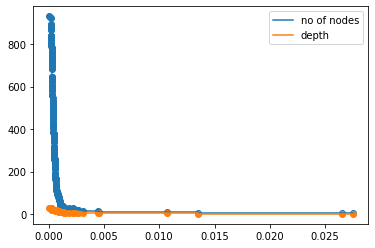

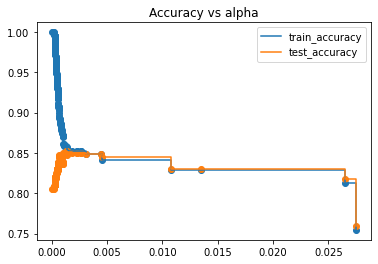

In [127]:
path = DT.cost_complexity_pruning_path(Xtrain, Ytrain)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

# For each alpha we will append our model to a list
DTs = []
for ccp_alpha in ccp_alphas:
    DT = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    DT.fit(Xtrain, Ytrain)
    DTs.append(DT)
    
DTs = DTs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [DT.tree_.node_count for DT in DTs]
depth = [DT.tree_.max_depth for DT in DTs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

train_acc = []
test_acc = []
for c in DTs:
    y_train_pred = c.predict(Xtrain)
    y_test_pred = c.predict(Xtest)
    train_acc.append(accuracy_score(y_train_pred,Ytrain))
    test_acc.append(accuracy_score(y_test_pred,Ytest))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

Train score 0.851965601965602
Test score 0.8504299754299754
Train Confusion matrix


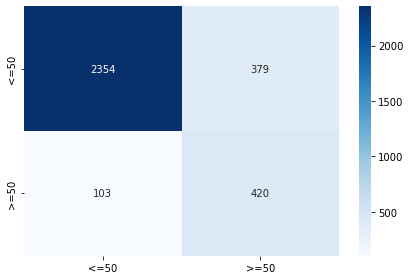

Test Confusion matrix


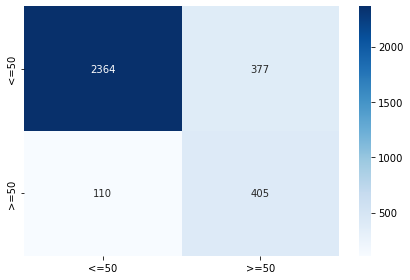

In [132]:
clf_ = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.003)
clf_.fit(Xtrain,Ytrain)
y_train_pred = clf_.predict(Xtrain)
y_test_pred = clf_.predict(Xtest)

print(f'Train score {accuracy_score(y_train_pred,Ytrain)}')
print(f'Test score {accuracy_score(y_test_pred,Ytest)}')
plot_confusionmatrix(y_train_pred,Ytrain,dom='Train')
plot_confusionmatrix(y_test_pred,Ytest,dom='Test')

# بهترین آلفا انتخاب شد

## DT by df7

In [133]:
Xtrain=df7.iloc[:, :-1]
Ytrain=df7.iloc[:,-1]
Xtest=df10.iloc[:, :-1]
Ytest=df10.iloc[:,-1]

DT = DecisionTreeClassifier()


DT.fit(Xtrain, Ytrain)
#روی چه دیتایی فیت بشه


pred = DT.predict(Xtest)
#ارزیابی داده های آزمایش جهت پیش بینی

pred

array([0, 0, 0, ..., 0, 1, 0])

In [134]:
(pred == Ytest).mean()
#accuracy

0.8034398034398035

In [135]:
from sklearn.metrics import accuracy_score,recall_score,precision_score, f1_score, confusion_matrix

from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(Xtrain, Ytrain)
pred = DT.predict(Xtest)


acc = accuracy_score(Ytest, pred)
#برای وقتی هست که داده ها متوازن باشن
#مثل دیتاست گل ها که همگی متوازن بودن

rec = recall_score(Ytest, pred)



pre = precision_score(Ytest, pred)


fm = f1_score(Ytest, pred)


conf = confusion_matrix(Ytest, pred)

print(acc, rec, pre, fm)
print(conf)
print(classification_report(Ytest, pred))
#دوهزار صد سی هفت داده به درستی صفر تشخیص داده شده
#چهارصد هشتاد دو داده به درستی یک تشخیص داده شده
# باقی مانده اشتباهات  هستند

0.8043611793611793 0.6163682864450127 0.5885225885225885 0.6021236727045596
[[2137  337]
 [ 300  482]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      2474
           1       0.59      0.62      0.60       782

    accuracy                           0.80      3256
   macro avg       0.73      0.74      0.74      3256
weighted avg       0.81      0.80      0.81      3256



# pruning and train-test graph

[0.         0.00015228 0.0001532  0.00017916 0.00018614 0.000189
 0.00019744 0.0002001  0.00020198 0.00020287 0.00020475 0.00023034
 0.00023034 0.00023034 0.00023932 0.00024055 0.0002457  0.0002457
 0.0002457  0.00025594 0.00025594 0.00025594 0.00026325 0.00026325
 0.00026325 0.00026325 0.00026707 0.00026873 0.000273   0.000273
 0.000273   0.00027422 0.00027641 0.00027641 0.00027714 0.0002792
 0.00028153 0.00028153 0.00028153 0.0002835  0.00028519 0.0002855
 0.00028585 0.00028665 0.00029214 0.00029317 0.00029377 0.00029882
 0.00029981 0.00029993 0.00030466 0.00030713 0.00030713 0.00030713
 0.00030713 0.00031022 0.00031307 0.00031395 0.00031477 0.00031992
 0.0003276  0.0003276  0.0003276  0.000336   0.00033939 0.00034442
 0.000351   0.000351   0.00035738 0.0003575  0.00035778 0.00035831
 0.00036563 0.00036855 0.00036855 0.00037623 0.00038244 0.00039017
 0.00039441 0.00039488 0.00040584 0.00040759 0.0004095  0.0004095
 0.0004095  0.0004095  0.0004095  0.0004095  0.0004095  0.0004095
 0.0

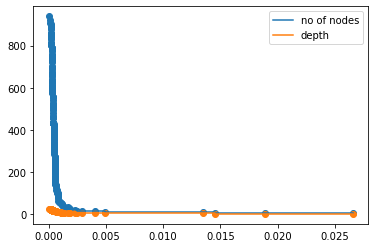

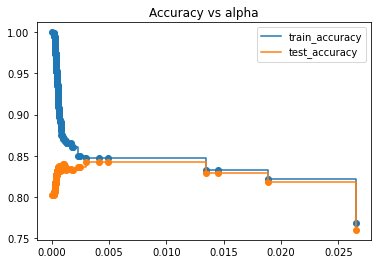

In [136]:
path = DT.cost_complexity_pruning_path(Xtrain, Ytrain)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

# For each alpha we will append our model to a list
DTs = []
for ccp_alpha in ccp_alphas:
    DT = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    DT.fit(Xtrain, Ytrain)
    DTs.append(DT)
    
DTs = DTs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [DT.tree_.node_count for DT in DTs]
depth = [DT.tree_.max_depth for DT in DTs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

train_acc = []
test_acc = []
for c in DTs:
    y_train_pred = c.predict(Xtrain)
    y_test_pred = c.predict(Xtest)
    train_acc.append(accuracy_score(y_train_pred,Ytrain))
    test_acc.append(accuracy_score(y_test_pred,Ytest))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

Train score 0.847051597051597
Test score 0.8421375921375921
Train Confusion matrix


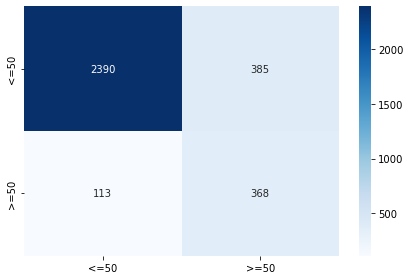

Test Confusion matrix


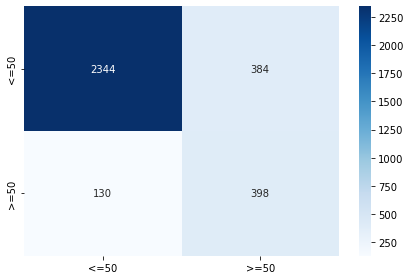

In [138]:
clf_ = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.005)
clf_.fit(Xtrain,Ytrain)
y_train_pred = clf_.predict(Xtrain)
y_test_pred = clf_.predict(Xtest)

print(f'Train score {accuracy_score(y_train_pred,Ytrain)}')
print(f'Test score {accuracy_score(y_test_pred,Ytest)}')
plot_confusionmatrix(y_train_pred,Ytrain,dom='Train')
plot_confusionmatrix(y_test_pred,Ytest,dom='Test')

# بهترین آلفا انتخاب شد

## DT by df8

In [139]:
Xtrain=df8.iloc[:, :-1]
Ytrain=df8.iloc[:,-1]
Xtest=df10.iloc[:, :-1]
Ytest=df10.iloc[:,-1]

DT = DecisionTreeClassifier()


DT.fit(Xtrain, Ytrain)
#روی چه دیتایی فیت بشه


pred = DT.predict(Xtest)
#ارزیابی داده های آزمایش جهت پیش بینی

pred

array([0, 1, 0, ..., 0, 0, 0])

In [140]:
(pred == Ytest).mean()
#accuracy

0.7951474201474201

In [141]:
from sklearn.metrics import accuracy_score,recall_score,precision_score, f1_score, confusion_matrix

from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(Xtrain, Ytrain)
pred = DT.predict(Xtest)


acc = accuracy_score(Ytest, pred)
#برای وقتی هست که داده ها متوازن باشن
#مثل دیتاست گل ها که همگی متوازن بودن

rec = recall_score(Ytest, pred)



pre = precision_score(Ytest, pred)


fm = f1_score(Ytest, pred)


conf = confusion_matrix(Ytest, pred)

print(acc, rec, pre, fm)
print(conf)
print(classification_report(Ytest, pred))
#دوهزار صد شانزده داده به درستی صفر تشخیص داده شده
#چهارصد شصت شش داده به درستی یک تشخیص داده شده
# باقی مانده اشتباهات  هستند

0.792997542997543 0.5959079283887468 0.5655339805825242 0.5803237858032378
[[2116  358]
 [ 316  466]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      2474
           1       0.57      0.60      0.58       782

    accuracy                           0.79      3256
   macro avg       0.72      0.73      0.72      3256
weighted avg       0.80      0.79      0.79      3256



# pruning and train-test graph

[0.         0.00015049 0.00019397 0.00019835 0.00020206 0.00020475
 0.00020475 0.00020805 0.00021499 0.00022714 0.0002451  0.0002457
 0.0002457  0.0002457  0.00025594 0.00025594 0.00025594 0.00025594
 0.00026278 0.00026325 0.00026325 0.00026325 0.00026873 0.00026873
 0.00026873 0.000273   0.000273   0.0002748  0.00027641 0.00027641
 0.00028153 0.00028153 0.00028153 0.00028153 0.0002835  0.00028906
 0.00029006 0.00029034 0.0002925  0.00029377 0.00029635 0.00029696
 0.00029722 0.00029782 0.0003018  0.00030233 0.00030338 0.00030713
 0.00030713 0.00030713 0.00030713 0.00030713 0.00030784 0.00031281
 0.0003148  0.00032402 0.00033784 0.00034125 0.00034326 0.00035065
 0.00035615 0.00036563 0.00036855 0.00036855 0.00036855 0.00037004
 0.00038391 0.00038457 0.00039488 0.00039488 0.00039833 0.000402
 0.00040341 0.00040684 0.0004095  0.0004095  0.0004095  0.0004095
 0.0004095  0.0004095  0.0004095  0.0004095  0.0004095  0.00041001
 0.00041175 0.00041496 0.00042237 0.0004305  0.00043098 0.0004372


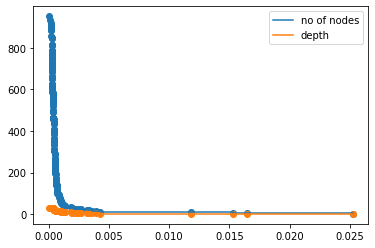

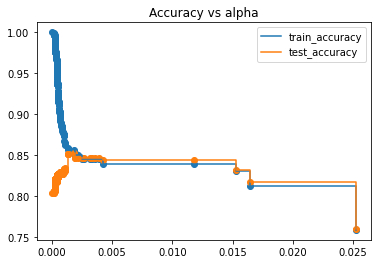

In [142]:
path = DT.cost_complexity_pruning_path(Xtrain, Ytrain)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

# For each alpha we will append our model to a list
DTs = []
for ccp_alpha in ccp_alphas:
    DT = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    DT.fit(Xtrain, Ytrain)
    DTs.append(DT)
    
DTs = DTs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [DT.tree_.node_count for DT in DTs]
depth = [DT.tree_.max_depth for DT in DTs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

train_acc = []
test_acc = []
for c in DTs:
    y_train_pred = c.predict(Xtrain)
    y_test_pred = c.predict(Xtest)
    train_acc.append(accuracy_score(y_train_pred,Ytrain))
    test_acc.append(accuracy_score(y_test_pred,Ytest))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

Train score 0.8578009828009828
Test score 0.8522727272727273
Train Confusion matrix


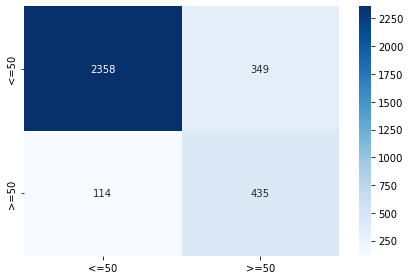

Test Confusion matrix


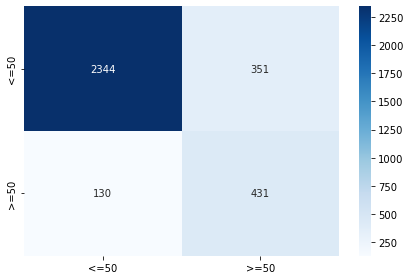

In [146]:
clf_ = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.0015)
clf_.fit(Xtrain,Ytrain)
y_train_pred = clf_.predict(Xtrain)
y_test_pred = clf_.predict(Xtest)

print(f'Train score {accuracy_score(y_train_pred,Ytrain)}')
print(f'Test score {accuracy_score(y_test_pred,Ytest)}')
plot_confusionmatrix(y_train_pred,Ytrain,dom='Train')
plot_confusionmatrix(y_test_pred,Ytest,dom='Test')

# بهترین آلفا انتخاب شد

## DT bt df9

In [147]:
Xtrain=df9.iloc[:, :-1]
Ytrain=df9.iloc[:,-1]
Xtest=df10.iloc[:, :-1]
Ytest=df10.iloc[:,-1]

DT = DecisionTreeClassifier()


DT.fit(Xtrain, Ytrain)
#روی چه دیتایی فیت بشه


pred = DT.predict(Xtest)
#ارزیابی داده های آزمایش جهت پیش بینی

pred

array([0, 0, 0, ..., 1, 1, 0])

In [148]:
(pred == Ytest).mean()
#accuracy

0.8098894348894349

In [149]:
from sklearn.metrics import accuracy_score,recall_score,precision_score, f1_score, confusion_matrix

from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(Xtrain, Ytrain)
pred = DT.predict(Xtest)


acc = accuracy_score(Ytest, pred)
#برای وقتی هست که داده ها متوازن باشن
#مثل دیتاست گل ها که همگی متوازن بودن

rec = recall_score(Ytest, pred)



pre = precision_score(Ytest, pred)


fm = f1_score(Ytest, pred)


conf = confusion_matrix(Ytest, pred)

print(acc, rec, pre, fm)
print(conf)
print(classification_report(Ytest, pred))
#دوهزار صد پنجاه نه داده به درستی صفر تشخیص داده شده
#چهارصد نود پنج داده به درستی یک تشخیص داده شده
# باقی مانده اشتباهات  هستند

0.8151105651105651 0.6329923273657289 0.6111111111111112 0.621859296482412
[[2159  315]
 [ 287  495]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      2474
           1       0.61      0.63      0.62       782

    accuracy                           0.82      3256
   macro avg       0.75      0.75      0.75      3256
weighted avg       0.82      0.82      0.82      3256



# pruning and train-test graph

[0.         0.00017446 0.0001755  0.00018769 0.00019451 0.00020066
 0.00020116 0.00020357 0.00020475 0.00020475 0.00023034 0.00023034
 0.00023034 0.00023888 0.00024497 0.0002457  0.0002512  0.00025594
 0.00026325 0.00026325 0.00026325 0.00026325 0.00026325 0.00026325
 0.00026325 0.00026325 0.00026618 0.00026873 0.00026873 0.0002691
 0.000273   0.000273   0.00027641 0.00027641 0.00027641 0.00027641
 0.00027788 0.0002792  0.00028153 0.00028153 0.0002835  0.0002835
 0.00028519 0.00028793 0.00028894 0.00028906 0.00029006 0.00029006
 0.00029138 0.00029169 0.00029484 0.00029666 0.00029774 0.00029782
 0.00029945 0.00029945 0.00029981 0.00030668 0.00030713 0.00030713
 0.00030713 0.00031161 0.00031598 0.0003185  0.00032175 0.00032288
 0.00033016 0.00033439 0.00034076 0.00034176 0.000351   0.000351
 0.00035393 0.0003549  0.0003549  0.00035831 0.00036643 0.00036855
 0.00036855 0.00036914 0.00037972 0.00038171 0.00038171 0.00038391
 0.00038391 0.00038955 0.00039287 0.00039488 0.00039488 0.00039488

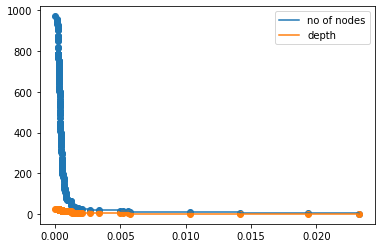

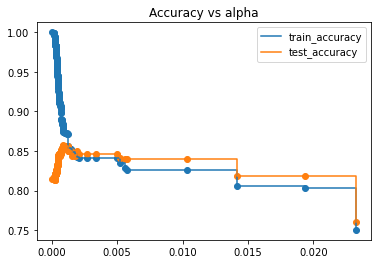

In [151]:
path = DT.cost_complexity_pruning_path(Xtrain, Ytrain)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

# For each alpha we will append our model to a list
DTs = []
for ccp_alpha in ccp_alphas:
    DT = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    DT.fit(Xtrain, Ytrain)
    DTs.append(DT)
    
DTs = DTs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [DT.tree_.node_count for DT in DTs]
depth = [DT.tree_.max_depth for DT in DTs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

train_acc = []
test_acc = []
for c in DTs:
    y_train_pred = c.predict(Xtrain)
    y_test_pred = c.predict(Xtest)
    train_acc.append(accuracy_score(y_train_pred,Ytrain))
    test_acc.append(accuracy_score(y_test_pred,Ytest))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

Train score 0.8427518427518428
Test score 0.8504299754299754
Train Confusion matrix


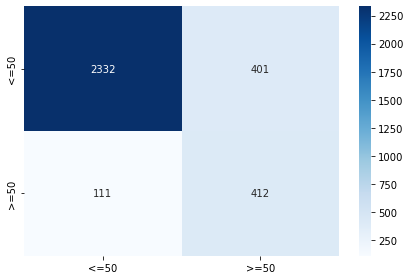

Test Confusion matrix


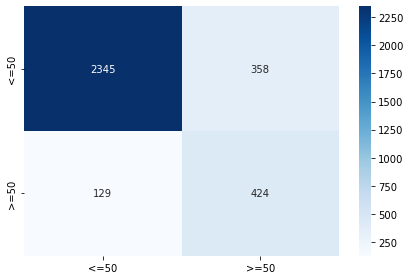

In [153]:
clf_ = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.002)
clf_.fit(Xtrain,Ytrain)
y_train_pred = clf_.predict(Xtrain)
y_test_pred = clf_.predict(Xtest)

print(f'Train score {accuracy_score(y_train_pred,Ytrain)}')
print(f'Test score {accuracy_score(y_test_pred,Ytest)}')
plot_confusionmatrix(y_train_pred,Ytrain,dom='Train')
plot_confusionmatrix(y_test_pred,Ytest,dom='Test')

# بهترین آلفا انتخاب شد